<a href="https://colab.research.google.com/github/SamaSamrin/Basic-CNN-Implementation/blob/main/Basic_CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils

import matplotlib.pyplot as plt
import numpy as np

# **Importing & Exploring the dataset**

The CIFAR10 dataset contains has **100 classes** containing **600 images each**. There are **500 training images and 100 testing images per class**. The 100 classes in the CIFAR-100 are grouped into **20 superclasses**. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

In [27]:
type(train_images)

numpy.ndarray

In [28]:
np.shape(train_images)

(50000, 32, 32, 3)

In [29]:
train_images[0,1,1]

array([254, 254, 254], dtype=uint8)

In [30]:
test_images[0,1,1]

array([195, 208, 238], dtype=uint8)

In [31]:
np.shape(test_labels)

(10000, 1)

In [32]:
test_labels[1,0]

33

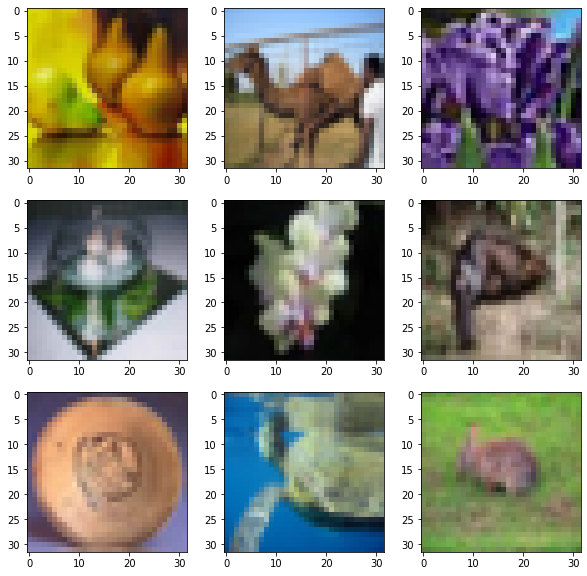

In [33]:
plt.figure(figsize=(10, 10))
for i in range (9):
  rand_num = np.random.randint(0, 50000)
  img = plt.subplot(3,3, i+1)
  plt.imshow(train_images[rand_num])

In [34]:
train_images[0,0].max()

255

In [35]:
test_images[0].max()

255

In [36]:
#Normalization
train_images = train_images/255.0
test_images = test_images/255.0

In [37]:
#One Hot Encoding
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

#**CNN Model**

In [38]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

# CNN for feature extraction
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# FC for classifying
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                    

### The input matrix of **30x30x32** is converted into the **1xN matrix (1x1x32)** after processing it with **5 convolution layers and 3 max pooling** operations. So it is ready to be flattened to a single column and fed to the fully connected layer which will classify the image. 

# **Training & Testing**

In [40]:
from keras import optimizers
from keras import backend as K
import time

##1 - Learning Rate: 0.001, Epochs/Steps: 50/10, Training time: 1 hr 45 min (appx), Accuracy: 19.7%



In [32]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before first fit:", model.optimizer.learning_rate.numpy())

Learning rate before first fit: 0.001


In [33]:
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=10,
                    epochs=50,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/50
10/10 [==============================] - 134s 13s/step - loss: 4.5992 - acc: 0.0105 - val_loss: 4.5835 - val_acc: 0.0164
Epoch 2/50
10/10 [==============================] - 123s 12s/step - loss: 4.5503 - acc: 0.0158 - val_loss: 4.5079 - val_acc: 0.0206
Epoch 3/50
10/10 [==============================] - 127s 13s/step - loss: 4.4734 - acc: 0.0203 - val_loss: 4.4365 - val_acc: 0.0287
Epoch 4/50
10/10 [==============================] - 123s 12s/step - loss: 4.3952 - acc: 0.0269 - val_loss: 4.3597 - val_acc: 0.0328
Epoch 5/50
10/10 [==============================] - 129s 13s/step - loss: 4.3096 - acc: 0.0357 - val_loss: 4.2775 - val_acc: 0.0442
Epoch 6/50
10/10 [==============================] - 133s 13s/step - loss: 4.2344 - acc: 0.0478 - val_loss: 4.2168 - val_acc: 0.0533
Epoch 7/50
10/10 [==============================] - 124s 13s/step - loss: 4.1726 - acc: 0.0635 - val_loss: 4.1477 - val_acc: 0.0661
Epoch 8/50
10/10 [==============================] - 126s 13s/step - loss: 4.

313/313 - 6s - loss: 3.3687 - acc: 0.1968 - 6s/epoch - 19ms/step


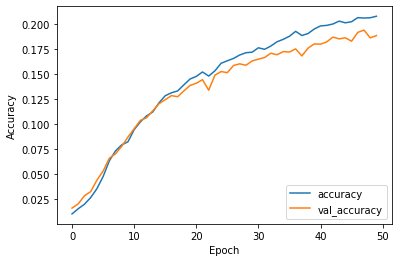

In [36]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
print(test_acc)

0.19679999351501465


##2 - Learning Rate: 0.0001, Epochs/Steps: 100/100, GPU selected as Hardware Accelerator, Training time: 5.4 minutes, Accuracy: 22%

In [41]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before second fit: 1e-04


In [42]:
import time
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/100
100/100 [==============================] - 12s 37ms/step - loss: 4.6008 - acc: 0.0104 - val_loss: 4.5827 - val_acc: 0.0121
Epoch 2/100
100/100 [==============================] - 3s 29ms/step - loss: 4.5260 - acc: 0.0198 - val_loss: 4.4709 - val_acc: 0.0225
Epoch 3/100
100/100 [==============================] - 3s 29ms/step - loss: 4.4211 - acc: 0.0249 - val_loss: 4.3839 - val_acc: 0.0358
Epoch 4/100
100/100 [==============================] - 3s 29ms/step - loss: 4.3482 - acc: 0.0331 - val_loss: 4.3255 - val_acc: 0.0366
Epoch 5/100
100/100 [==============================] - 3s 28ms/step - loss: 4.2920 - acc: 0.0395 - val_loss: 4.2775 - val_acc: 0.0436
Epoch 6/100
100/100 [==============================] - 2s 24ms/step - loss: 4.2449 - acc: 0.0450 - val_loss: 4.2433 - val_acc: 0.0467
Epoch 7/100
100/100 [==============================] - 2s 24ms/step - loss: 4.2067 - acc: 0.0494 - val_loss: 4.2046 - val_acc: 0.0550
Epoch 8/100
100/100 [==============================] - 2s 24m

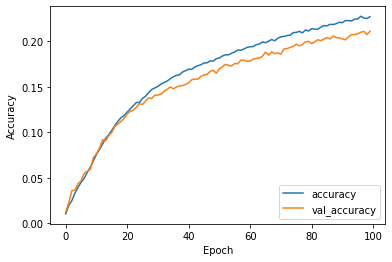

In [43]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 3.2837 - acc: 0.2177 - 873ms/epoch - 3ms/step
0.21770000457763672


##3 - Learning Rate: 1e-05, Epochs/Steps: 100/100, GPU as Hardware Accelerator, Training time: 5.33 minutes, Accuracy: 23%

In [46]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-05),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before third fit:", model.optimizer.learning_rate.numpy())

Learning rate before third fit: 1e-05


In [50]:
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/100
100/100 [==============================] - 4s 36ms/step - loss: 3.1278 - acc: 0.2394 - val_loss: 3.2241 - val_acc: 0.2261
Epoch 2/100
100/100 [==============================] - 3s 31ms/step - loss: 3.1271 - acc: 0.2396 - val_loss: 3.2245 - val_acc: 0.2258
Epoch 3/100
100/100 [==============================] - 3s 25ms/step - loss: 3.1266 - acc: 0.2403 - val_loss: 3.2241 - val_acc: 0.2260
Epoch 4/100
100/100 [==============================] - 3s 25ms/step - loss: 3.1261 - acc: 0.2404 - val_loss: 3.2251 - val_acc: 0.2266
Epoch 5/100
100/100 [==============================] - 3s 26ms/step - loss: 3.1253 - acc: 0.2406 - val_loss: 3.2253 - val_acc: 0.2238
Epoch 6/100
100/100 [==============================] - 3s 32ms/step - loss: 3.1247 - acc: 0.2405 - val_loss: 3.2258 - val_acc: 0.2251
Epoch 7/100
100/100 [==============================] - 3s 26ms/step - loss: 3.1240 - acc: 0.2404 - val_loss: 3.2261 - val_acc: 0.2270
Epoch 8/100
100/100 [==============================] - 3s 30ms

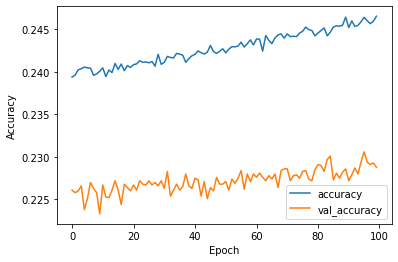

In [51]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [52]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 3.2063 - acc: 0.2302 - 1s/epoch - 4ms/step
0.23019999265670776


##4 - Learning Rate: 1e-04, Epochs/Steps: 500/100, GPU as Hardware Accelerator, Training time: 24.22 minutes, Accuracy: 27.4%

In [54]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-05),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before fourth fit:", model.optimizer.learning_rate.numpy())

Learning rate before fourth fit: 1e-05


In [56]:
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=100,
                    epochs=500,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/500
100/100 [==============================] - 3s 35ms/step - loss: 2.9340 - acc: 0.2765 - val_loss: 3.0999 - val_acc: 0.2457
Epoch 2/500
100/100 [==============================] - 5s 45ms/step - loss: 2.9341 - acc: 0.2761 - val_loss: 3.0991 - val_acc: 0.2456
Epoch 3/500
100/100 [==============================] - 5s 48ms/step - loss: 2.9335 - acc: 0.2771 - val_loss: 3.0993 - val_acc: 0.2463
Epoch 4/500
100/100 [==============================] - 5s 52ms/step - loss: 2.9341 - acc: 0.2765 - val_loss: 3.1017 - val_acc: 0.2452
Epoch 5/500
100/100 [==============================] - 3s 31ms/step - loss: 2.9339 - acc: 0.2762 - val_loss: 3.0989 - val_acc: 0.2461
Epoch 6/500
100/100 [==============================] - 3s 30ms/step - loss: 2.9328 - acc: 0.2772 - val_loss: 3.0988 - val_acc: 0.2451
Epoch 7/500
100/100 [==============================] - 3s 30ms/step - loss: 2.9321 - acc: 0.2768 - val_loss: 3.0998 - val_acc: 0.2454
Epoch 8/500
100/100 [==============================] - 3s 25ms

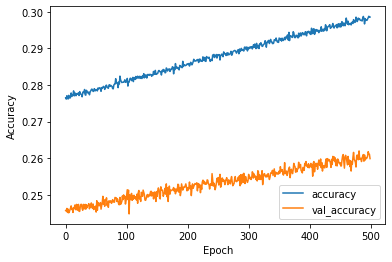

In [57]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [58]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 3.0036 - acc: 0.2741 - 893ms/epoch - 3ms/step
0.27410000562667847


##5 - Learning Rate: 1e-04, Epochs/Steps: 100/500, GPU as Hardware Accelerator, Training time: 7.23 minutes, Accuracy: 31%

In [59]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-04),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before second fit:", model.optimizer.learning_rate.numpy())

Learning rate before second fit: 1e-04


In [60]:
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=500,
                    epochs=100,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/100
500/500 [==============================] - 6s 10ms/step - loss: 2.8792 - acc: 0.2849 - val_loss: 3.0681 - val_acc: 0.2522
Epoch 2/100
500/500 [==============================] - 4s 7ms/step - loss: 2.8707 - acc: 0.2858 - val_loss: 3.0333 - val_acc: 0.2574
Epoch 3/100
500/500 [==============================] - 4s 8ms/step - loss: 2.8697 - acc: 0.2865 - val_loss: 3.0369 - val_acc: 0.2568
Epoch 4/100
500/500 [==============================] - 4s 9ms/step - loss: 2.8688 - acc: 0.2844 - val_loss: 3.0443 - val_acc: 0.2560
Epoch 5/100
500/500 [==============================] - 4s 8ms/step - loss: 2.8647 - acc: 0.2868 - val_loss: 3.0260 - val_acc: 0.2557
Epoch 6/100
500/500 [==============================] - 4s 7ms/step - loss: 2.8588 - acc: 0.2888 - val_loss: 3.0233 - val_acc: 0.2616
Epoch 7/100
500/500 [==============================] - 4s 8ms/step - loss: 2.8523 - acc: 0.2906 - val_loss: 3.0886 - val_acc: 0.2496
Epoch 8/100
500/500 [==============================] - 4s 7ms/step -

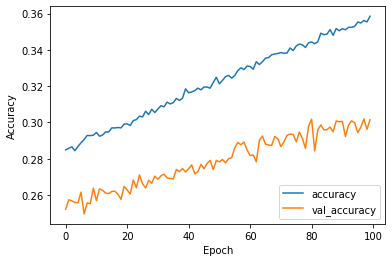

In [61]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [62]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 2.7652 - acc: 0.3114 - 878ms/epoch - 3ms/step
0.31139999628067017


##6 - Learning Rate: 1e-05, Epochs/Steps: 100/500, GPU as Hardware Accelerator, Training time: 6.40 minutes, Accuracy: 31.9%

In [64]:
model.compile(optimizer=optimizers.Adam(learning_rate=1e-05),
              loss='categorical_crossentropy',
              metrics=['acc'])
print("Learning rate before fifth fit:", model.optimizer.learning_rate.numpy())

Learning rate before fifth fit: 1e-05


In [65]:
training_start = time.time()
history = model.fit(train_images, train_labels,
                    steps_per_epoch=500,
                    epochs=100,
                    validation_split=0.2) 
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")

Epoch 1/100
500/500 [==============================] - 5s 9ms/step - loss: 2.4705 - acc: 0.3686 - val_loss: 2.7722 - val_acc: 0.3118
Epoch 2/100
500/500 [==============================] - 4s 8ms/step - loss: 2.4659 - acc: 0.3706 - val_loss: 2.7708 - val_acc: 0.3117
Epoch 3/100
500/500 [==============================] - 4s 9ms/step - loss: 2.4648 - acc: 0.3695 - val_loss: 2.7733 - val_acc: 0.3117
Epoch 4/100
500/500 [==============================] - 4s 8ms/step - loss: 2.4636 - acc: 0.3709 - val_loss: 2.7733 - val_acc: 0.3112
Epoch 5/100
500/500 [==============================] - 4s 8ms/step - loss: 2.4638 - acc: 0.3706 - val_loss: 2.7712 - val_acc: 0.3131
Epoch 6/100
500/500 [==============================] - 4s 8ms/step - loss: 2.4622 - acc: 0.3717 - val_loss: 2.7730 - val_acc: 0.3123
Epoch 7/100
500/500 [==============================] - 4s 8ms/step - loss: 2.4635 - acc: 0.3716 - val_loss: 2.7705 - val_acc: 0.3113
Epoch 8/100
500/500 [==============================] - 4s 8ms/step - 

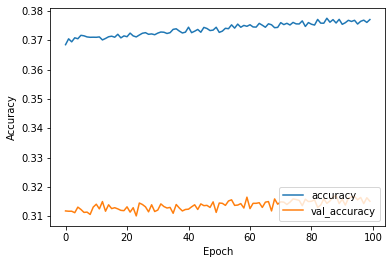

In [66]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 2.7311 - acc: 0.3192 - 1s/epoch - 3ms/step
0.3192000091075897
